## Filtering and averaging data

First thing we need to do is to import the MSJ package.

In [1]:
using MSJ

We will use the same data set as in Example 1

In [2]:
using HTTP

data = download("https://raw.githubusercontent.com/ajgiuliani/MSJ.jl/master/test/test.mzXML", 
                "~/Downloads/test.mzXML") ;

Now, using the `info` function of the `MSJ`package, we will see what is inside the file

In [3]:
info(data)

4-element Array{String,1}:
 "6 scans"                
 "MS1+"                   
 "MS2+ 1255.5  CID(CE=18)"
 "MS3+ 902.33  PQD(CE=35)"

In [4]:
s = load(data) ;

Getting chromatograms is straightforward using the `chromatogram` method.
We load the entiere chromatogram like this:

In [5]:
full_TIC = chromatogram(s)

msJ.Chromatogram([0.1384, 0.7307, 2.1379, 3.7578, 4.3442, 5.7689], [5.08195e6, 9727.2, 11.3032, 4.8084e6, 12203.5, 4.84455], 5.08195e6)

We may also filter the data to first MS level:

In [6]:
MS1_TIC = chromatogram(s, MSJ.Level(1))

msJ.Chromatogram([0.1384, 3.7578], [5.08195e6, 4.8084e6], 5.08195e6)

Or we may get only the mass spectrometry data which have been aquirred under CID conditions:

In [7]:
CID_TIC = chromatogram(s, MSJ.Activation_Method("CID"))

msJ.Chromatogram([0.7307, 4.3442], [9727.2, 12203.5], 12203.5)

We can also extract the chromatogram for a specific precursor ion:

In [8]:
mz902_TIC = chromatogram(s, MSJ.Precursor(902.33))

msJ.Chromatogram([2.1379, 5.7689], [11.3032, 4.84455], 11.3032)

Let plot the chromatograms, using theGR backend:

In [9]:
using Plots
gr()

Plots.GRBackend()

A recipe has also been defined for chromatogram data.

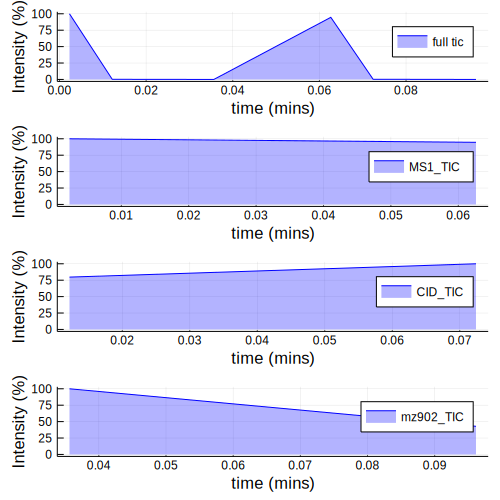

In [10]:
gr()
p1 = plot(full_TIC, label = "full tic")
p2 = plot(MS1_TIC, label = " MS1_TIC")
p3 = plot(CID_TIC, label = "CID_TIC")
p4 = plot(mz902_TIC, label = "mz902_TIC")

p = plot(p1, p2, p3, p4, layout = (4,1), size = (500,500))

Plots made using GR() may be saved to a file:

In [11]:
savefig(p, "~/Downloads/temp.png")

Average mass spectra may be obtained using the proper `msfilter` functions:

In [12]:
ms1 = MSJ.average(s, MSJ.Level(1))                              # MS1 scans
ms2_CID = MSJ.average(s, MSJ.Activation_Method("CID"))          # CID scans
ms2_PQD = MSJ.average(s, MSJ.Activation_Method("PQD"))          # PQD scans
ms2_1255 = MSJ.average(s, MSJ.Precursor(1255.5));               # Precursor m/z = 1255.5 scans

Mass spectra may be plotted the same way as chromatograms:

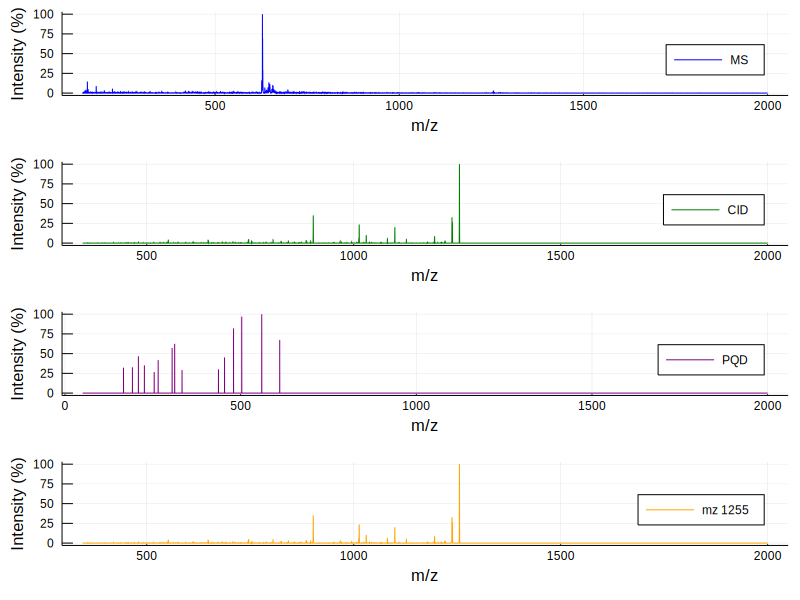

In [13]:
p5 = plot(ms1, label = "MS", color = :blue)
p6 = plot(ms2_CID, label = "CID", color = :green)
p7 = plot(ms2_PQD, label = "PQD", color = :purple)
p8 = plot(ms2_1255, label = "mz 1255", color = :orange)
plot(p5, p6, p7, p8, layout = (4,1), size = (800,600))